In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [5]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_social_marital_status.csv")

In [6]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")

In [7]:
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [8]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,GCC_CODE16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,p_tot_marrd_reg_marrge,p_tot_married_de_facto,p_tot_not_married,p_tot_total,registered_marriage_percent,defacto_percent,not_married_percent,Preferred Party
0,0,101021007,New South Wales,1RNSW,655,850,1505,101021007,1301,376,942,2616,0.497324,0.143731,0.360092,ALP
1,1,101021008,New South Wales,1RNSW,600,937,1537,101021008,2665,719,2657,6044,0.440933,0.118961,0.439610,ALP
2,2,101021009,New South Wales,1RNSW,7954,9937,17891,101021009,3036,916,3883,7837,0.387393,0.116881,0.495470,ALP
3,3,101021010,New South Wales,1RNSW,756,1040,1796,101021010,1490,458,1589,3548,0.419955,0.129087,0.447858,ALP
4,4,101021011,New South Wales,1RNSW,3023,3052,6075,101021011,6740,1465,3303,11505,0.585832,0.127336,0.287093,ALP


In [91]:
pdf = df[["STE_NAME16", "Preferred Party", "not_married_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

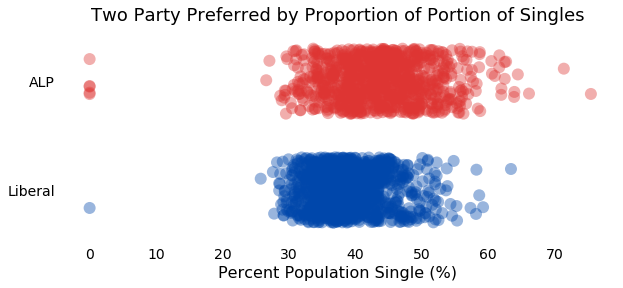

In [92]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,4))

parties = pdf["Preferred Party"].values
singles = pdf["not_married_percent"].values*100
state = pdf["STE_NAME16"].values

sns.stripplot(singles, parties, jitter = 0.3, size = 12, edgecolor = 'none', alpha = 0.4, palette = colours)
#axes.plot(df.groupby("Preferred Party").median()["christianity_tot_percent"]*100, "_k", ms = 80)

# Add Title
axes.set_title("Two Party Preferred by Proportion of Portion of Singles", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population Single (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

In [14]:
hdf = df[["STE_NAME16", "liberal/national coalition votes", "totalvotes", "not_married_percent"]]
hdf = hdf.loc[hdf["STE_NAME16"] != "Other Territories",]
hdf["pct_liberal"] = (hdf["liberal/national coalition votes"] / hdf["totalvotes"])
#pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

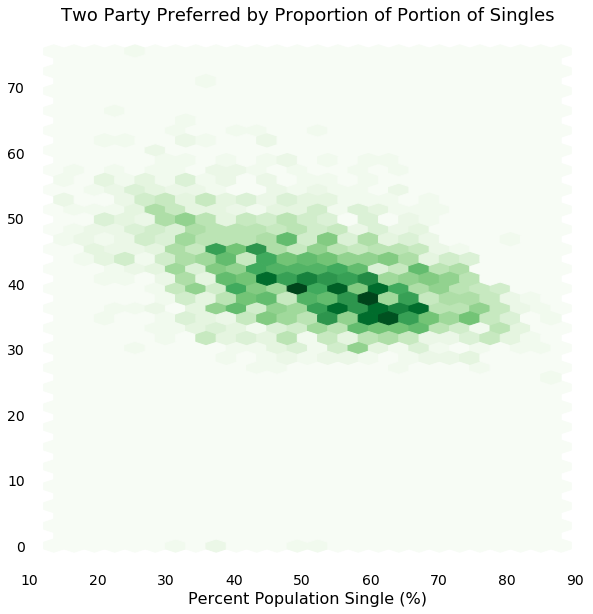

In [34]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

lib_vote = hdf["pct_liberal"].values * 100
singles = hdf["not_married_percent"].values * 100

axes.hexbin(lib_vote, singles, gridsize = (25,25), cmap = plt.cm.Greens)

# Add Title
axes.set_title("Two Party Preferred by Proportion of Portion of Singles", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population Single (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

In [60]:
tempdf = df
tempdf["Preferred Party"] = np.where(tempdf["liberal/national coalition votes"] / tempdf["totalvotes"] > 0.5, "Liberal", "ALP")
tempdf = tempdf[["Preferred Party","not_married_percent","registered_marriage_percent","defacto_percent"]]

In [61]:
#tempdf = tempdf.groupby("Preferred Party").median()
tempdf.head()

,Preferred Party,not_married_percent,registered_marriage_percent,defacto_percent
0,ALP,0.360092,0.497324,0.143731
1,ALP,0.439610,0.440933,0.118961
2,ALP,0.495470,0.387393,0.116881
3,ALP,0.447858,0.419955,0.129087
4,ALP,0.287093,0.585832,0.127336


In [62]:
cut_labels = ["20-30% Single","30-40% Single","40-50% Single","50-60% Single","60%+ Single"]
cut_bins = [.2, .3, .4, .5, .6, 1]
tempdf["single_bins"] = pd.cut(tempdf["not_married_percent"],
                               bins = cut_bins,
                               labels = cut_labels)
tempdf = tempdf.groupby(["Preferred Party", "single_bins"]).size().reset_index(name = "Count")
tempdf.head()

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Preferred Party,single_bins,Count
0,ALP,20-30% Single,11
1,ALP,30-40% Single,266
2,ALP,40-50% Single,487
3,ALP,50-60% Single,142
4,ALP,60%+ Single,16


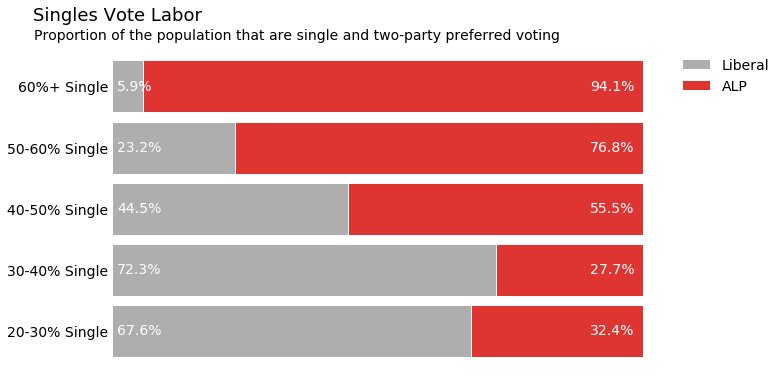

In [99]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#aeaeae"
alp_colour = "#DE3533"

# Set plot values
parties = tempdf.loc[:,"Preferred Party"].unique()
single_bins = np.sort(tempdf.loc[:,"single_bins"].unique())

for single_bin in single_bins:
    # Find the position of the bin in the list
    position = [i for i,x in enumerate(single_bins) if x == single_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(tempdf.loc[tempdf["single_bins"] == single_bin, "Count"])
    lib_pct = (tempdf.loc[(tempdf["single_bins"] == single_bin) & (tempdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (tempdf.loc[(tempdf["single_bins"] == single_bin) & (tempdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(single_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(single_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Proportion of the population that are single and two-party preferred voting"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.803,1))
fig.suptitle("Singles Vote Labor"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.25,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [100]:
fig.savefig("single_votes.png", dpi = 300, bbox_inches = "tight")

In [76]:
mardf = df
mardf["Preferred Party"] = np.where(mardf["liberal/national coalition votes"] / mardf["totalvotes"] > 0.5, "Liberal", "ALP")
mardf = mardf[["Preferred Party","not_married_percent","registered_marriage_percent","defacto_percent"]]
cut_labels = ["20-30% Married","30-40% Married","40-50% Married","50-60% Married","60%+ Married"]
cut_bins = [.2, .3, .4, .5, .6, 1]
mardf["married_bins"] = pd.cut(mardf["registered_marriage_percent"],
                               bins = cut_bins,
                               labels = cut_labels)
mardf = mardf.groupby(["Preferred Party", "married_bins"]).size().reset_index(name = "Count")
mardf.head()

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Preferred Party,married_bins,Count
0,ALP,20-30% Married,41
1,ALP,30-40% Married,175
2,ALP,40-50% Married,417
3,ALP,50-60% Married,266
4,ALP,60%+ Married,13


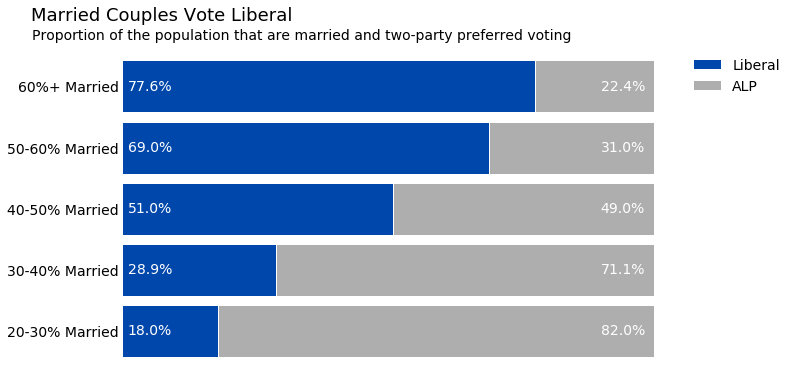

In [98]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#0047AB"
alp_colour = "#aeaeae"

# Set plot values
parties = mardf.loc[:,"Preferred Party"].unique()
married_bins = np.sort(mardf.loc[:,"married_bins"].unique())

for married_bin in married_bins:
    # Find the position of the bin in the list
    position = [i for i,x in enumerate(married_bins) if x == married_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(mardf.loc[mardf["married_bins"] == married_bin, "Count"])
    lib_pct = (mardf.loc[(mardf["married_bins"] == married_bin) & (mardf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (mardf.loc[(mardf["married_bins"] == married_bin) & (mardf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(married_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(married_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Proportion of the population that are married and two-party preferred voting"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.805,1))
fig.suptitle("Married Couples Vote Liberal"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.361,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [101]:
fig.savefig("married_couples.png", dpi = 300, bbox_inches = "tight")